In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = folder.split('/')[-1]
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            image = cv2.imread(img_path)
            if image is not None:
                images.append(image)
                labels.append(label)
    return images, labels


folder_paths = ["/content/drive/MyDrive/rice_leaf_diseases/Bacterial_leaf_blight", "/content/drive/MyDrive/rice_leaf_diseases/Brown_spot", "/content/drive/MyDrive/rice_leaf_diseases/Leaf_smut"]

all_images = []
all_labels = []


for folder_path in folder_paths:
    images, labels = load_images_from_folder(folder_path)
    all_images.extend(images)
    all_labels.extend(labels)


RESIZE_WIDTH = 100
RESIZE_HEIGHT = 100
resized_images = []
for img in all_images:
    resized_img = cv2.resize(img, (RESIZE_WIDTH, RESIZE_HEIGHT))
    resized_images.append(resized_img)


images_np_resized = np.array(resized_images)
labels_np = np.array(all_labels)



KNN Accuracy: 0.625
KNN Classification Report:
                       precision    recall  f1-score   support

Bacterial_leaf_blight       1.00      0.62      0.77         8
           Brown_spot       0.60      0.60      0.60        10
            Leaf_smut       0.44      0.67      0.53         6

             accuracy                           0.62        24
            macro avg       0.68      0.63      0.63        24
         weighted avg       0.69      0.62      0.64        24

SVM Accuracy: 0.8333333333333334
SVM Classification Report:
                       precision    recall  f1-score   support

Bacterial_leaf_blight       0.88      0.88      0.88         8
           Brown_spot       1.00      0.70      0.82        10
            Leaf_smut       0.67      1.00      0.80         6

             accuracy                           0.83        24
            macro avg       0.85      0.86      0.83        24
         weighted avg       0.88      0.83      0.83        24



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8333333333333334
Logistic Regression Classification Report:
                       precision    recall  f1-score   support

Bacterial_leaf_blight       1.00      0.88      0.93         8
           Brown_spot       1.00      0.70      0.82        10
            Leaf_smut       0.60      1.00      0.75         6

             accuracy                           0.83        24
            macro avg       0.87      0.86      0.84        24
         weighted avg       0.90      0.83      0.84        24

Epoch 1/10
3/3 [==============================] - 1s 212ms/step - loss: 5980.1367 - accuracy: 0.3646 - val_loss: 190.6133 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 110ms/step - loss: 4765.3950 - accuracy: 0.3021 - val_loss: 3880.6262 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 0s 114ms/step - loss: 4209.1094 - accuracy: 0.3750 - val_loss: 1411.2896 - val_accuracy: 0.4167
Epoch 4/10
3/3 [===========

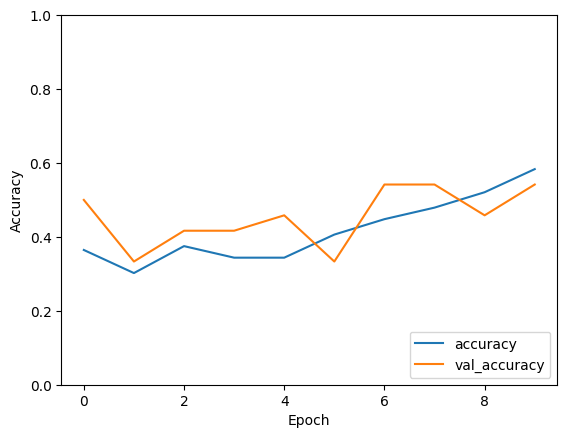

KNN Accuracy: 0.625
SVM Accuracy: 0.8333333333333334
Logistic Regression Accuracy: 0.8333333333333334
ANN Accuracy: 0.5416666865348816


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models

X_train, X_test, y_train, y_test = train_test_split(images_np_resized, labels_np, test_size=0.2, random_state=42)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_scaled, y_train)
logistic_predictions = logistic_classifier.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

# Artificial Neural Network (ANN) using TensorFlow/Keras
input_shape = X_train.shape[1:]  # Shape of a single image
num_classes = len(np.unique(y_train))  # Number of unique classes

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from sklearn.preprocessing import LabelEncoder

# Convert string labels to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

# Evaluate the model
ann_loss, ann_accuracy = model.evaluate(X_test, y_test_encoded)
print("ANN Accuracy:", ann_accuracy)

# Plot accuracy and loss over training epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
print("KNN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("ANN Accuracy:", ann_accuracy)

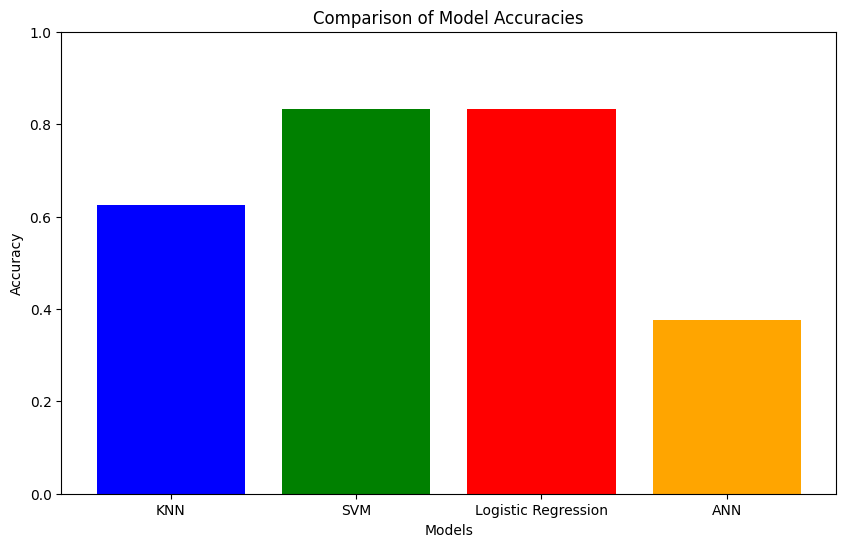

In [ ]:
models = ['KNN', 'SVM', 'Logistic Regression', 'ANN']
accuracies = [knn_accuracy, svm_accuracy, logistic_accuracy, ann_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])
plt.show()

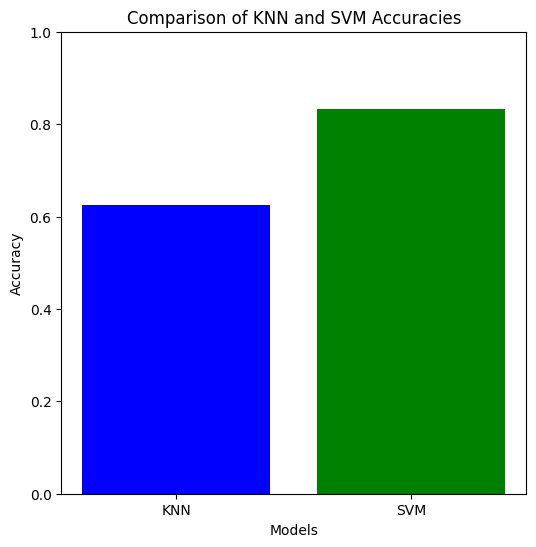

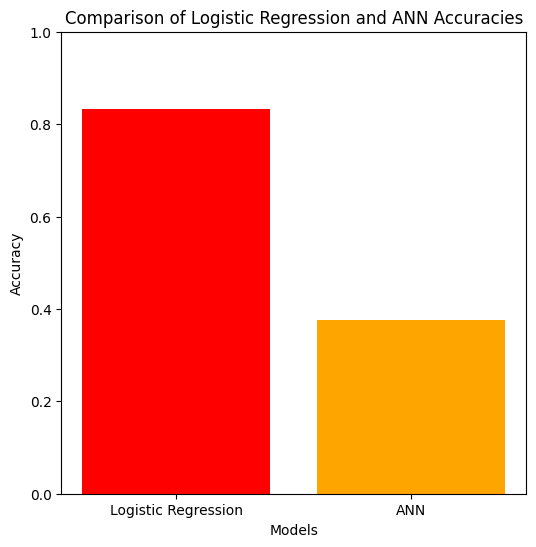

In [ ]:
# Plotting comparison graph between KNN and SVM
models_knn_svm = ['KNN', 'SVM']
accuracies_knn_svm = [knn_accuracy, svm_accuracy]

plt.figure(figsize=(6, 6))
plt.bar(models_knn_svm, accuracies_knn_svm, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of KNN and SVM Accuracies')
plt.ylim([0, 1])
plt.show()

# Plotting comparison graph between Logistic Regression and ANN
models_lr_ann = ['Logistic Regression', 'ANN']
accuracies_lr_ann = [logistic_accuracy, ann_accuracy]

plt.figure(figsize=(6, 6))
plt.bar(models_lr_ann, accuracies_lr_ann, color=['red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Logistic Regression and ANN Accuracies')
plt.ylim([0, 1])
plt.show()

In [ ]:
# Calculate F1 scores for each model
from sklearn.metrics import f1_score

# KNN F1 Score
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
print("KNN F1 Score:", knn_f1)

# SVM F1 Score
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
print("SVM F1 Score:", svm_f1)

# Logistic Regression F1 Score
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')
print("Logistic Regression F1 Score:", logistic_f1)

# ANN F1 Score
ann_predictions = np.argmax(model.predict(X_test), axis=-1)  # Convert softmax probabilities to class labels
ann_f1 = f1_score(y_test_encoded, ann_predictions, average='weighted')
print("ANN F1 Score:", ann_f1)


KNN F1 Score: 0.6397435897435897
SVM F1 Score: 0.8348039215686275
Logistic Regression F1 Score: 0.8417483660130718
1/1 [==============================] - 0s 112ms/step
ANN F1 Score: 0.29292929292929293


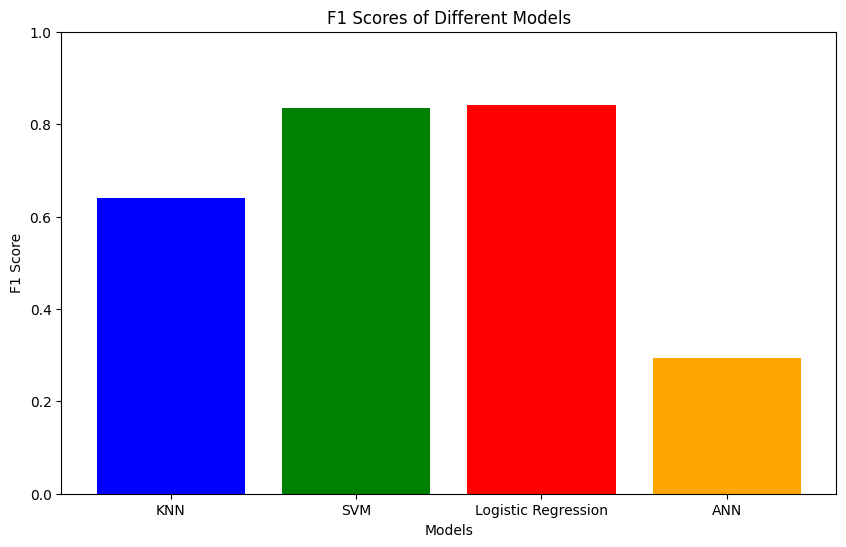

In [ ]:

models = ['KNN', 'SVM', 'Logistic Regression', 'ANN']
f1_scores = [knn_f1, svm_f1, logistic_f1, ann_f1]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Models')
plt.ylim([0, 1])
plt.show()


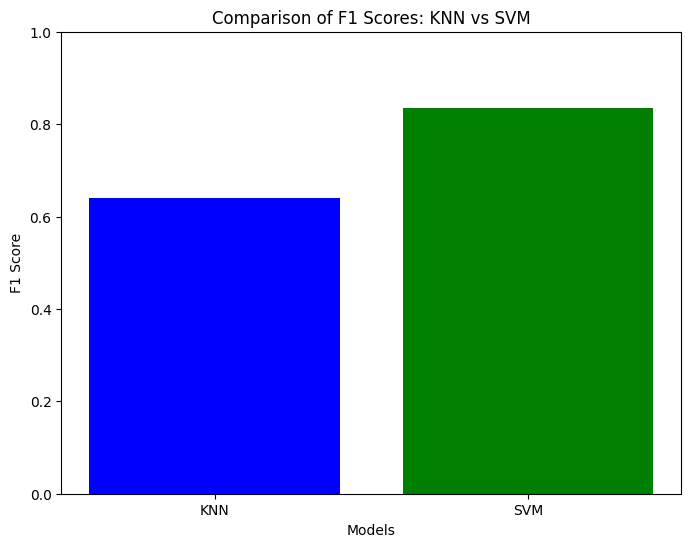

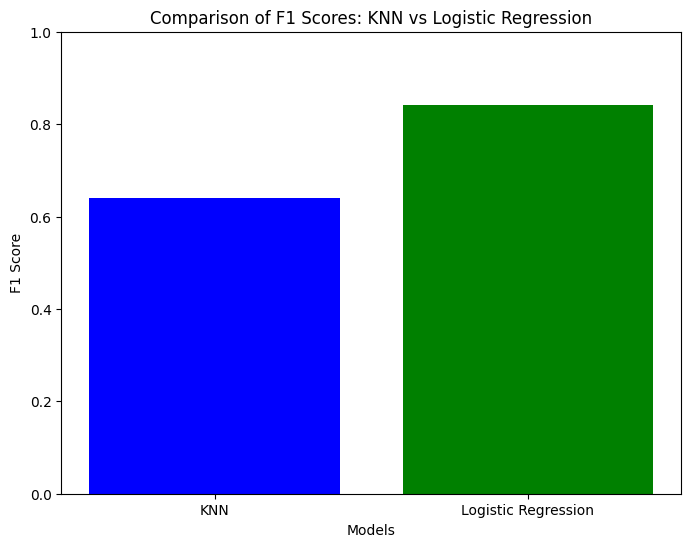

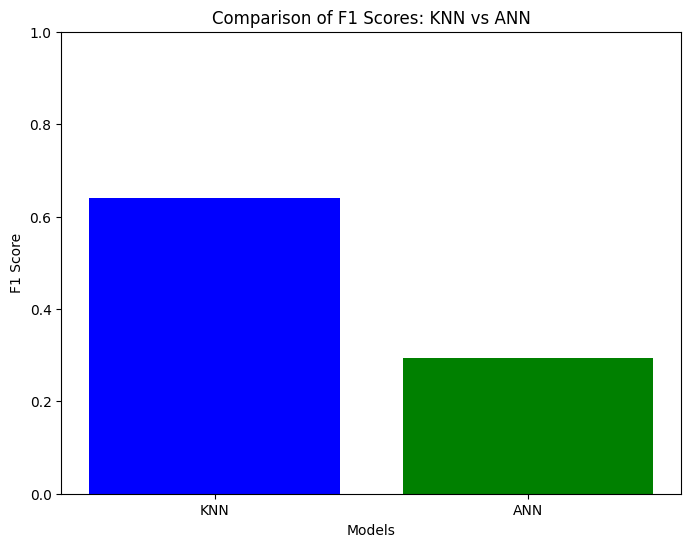

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their F1 scores
models = ['KNN', 'SVM', 'Logistic Regression', 'ANN']
f1_scores = [knn_f1, svm_f1, logistic_f1, ann_f1]

# Create a function to plot the comparison graph
def plot_comparison(model1_name, model2_name, model1_score, model2_score):
    plt.figure(figsize=(8, 6))
    plt.bar([model1_name, model2_name], [model1_score, model2_score], color=['blue', 'green'])
    plt.xlabel('Models')
    plt.ylabel('F1 Score')
    plt.title('Comparison of F1 Scores: {} vs {}'.format(model1_name, model2_name))
    plt.ylim([0, 1])
    plt.show()

# Comparison: KNN vs SVM
plot_comparison('KNN', 'SVM', knn_f1, svm_f1)

# Comparison: KNN vs Logistic Regression
plot_comparison('KNN', 'Logistic Regression', knn_f1, logistic_f1)

# Comparison: KNN vs ANN
plot_comparison('KNN', 'ANN', knn_f1, ann_f1)


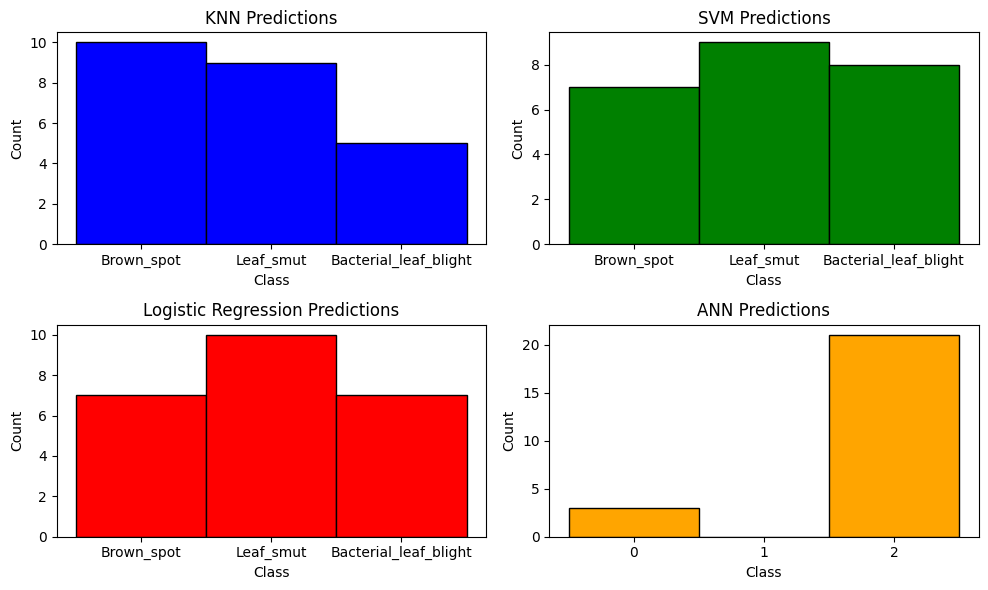

KNN Predictions: ['Brown_spot' 'Brown_spot' 'Leaf_smut' 'Leaf_smut' 'Bacterial_leaf_blight'
 'Brown_spot' 'Leaf_smut' 'Bacterial_leaf_blight' 'Brown_spot' 'Leaf_smut'
 'Brown_spot' 'Leaf_smut' 'Bacterial_leaf_blight' 'Bacterial_leaf_blight'
 'Leaf_smut' 'Leaf_smut' 'Brown_spot' 'Bacterial_leaf_blight' 'Leaf_smut'
 'Brown_spot' 'Leaf_smut' 'Brown_spot' 'Brown_spot' 'Brown_spot']
SVM Predictions: ['Brown_spot' 'Brown_spot' 'Leaf_smut' 'Leaf_smut' 'Bacterial_leaf_blight'
 'Brown_spot' 'Bacterial_leaf_blight' 'Bacterial_leaf_blight' 'Brown_spot'
 'Leaf_smut' 'Bacterial_leaf_blight' 'Brown_spot' 'Bacterial_leaf_blight'
 'Bacterial_leaf_blight' 'Leaf_smut' 'Leaf_smut' 'Leaf_smut'
 'Bacterial_leaf_blight' 'Leaf_smut' 'Leaf_smut' 'Brown_spot' 'Brown_spot'
 'Bacterial_leaf_blight' 'Leaf_smut']
Logistic Regression Predictions: ['Brown_spot' 'Brown_spot' 'Leaf_smut' 'Leaf_smut' 'Bacterial_leaf_blight'
 'Brown_spot' 'Leaf_smut' 'Bacterial_leaf_blight' 'Brown_spot' 'Leaf_smut'
 'Bacterial_leaf_blig

In [ ]:

plt.figure(figsize=(10, 6))

# KNN Predictions
plt.subplot(2, 2, 1)
plt.hist(knn_predictions, bins=np.arange(len(np.unique(y_test)) + 1) - 0.5, color='blue', edgecolor='black')
plt.xticks(np.arange(len(np.unique(y_test))))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('KNN Predictions')

# SVM Predictions
plt.subplot(2, 2, 2)
plt.hist(svm_predictions, bins=np.arange(len(np.unique(y_test)) + 1) - 0.5, color='green', edgecolor='black')
plt.xticks(np.arange(len(np.unique(y_test))))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('SVM Predictions')

# Logistic Regression Predictions
plt.subplot(2, 2, 3)
plt.hist(logistic_predictions, bins=np.arange(len(np.unique(y_test)) + 1) - 0.5, color='red', edgecolor='black')
plt.xticks(np.arange(len(np.unique(y_test))))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Logistic Regression Predictions')

# ANN Predictions
plt.subplot(2, 2, 4)
plt.hist(ann_predictions, bins=np.arange(len(np.unique(y_test)) + 1) - 0.5, color='orange', edgecolor='black')
plt.xticks(np.arange(len(np.unique(y_test))))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('ANN Predictions')

plt.tight_layout()
plt.show()

# Print predictions of each model
print("KNN Predictions:", knn_predictions)
print("SVM Predictions:", svm_predictions)
print("Logistic Regression Predictions:", logistic_predictions)
print("ANN Predictions:", ann_predictions)


In [ ]:
from sklearn.metrics import classification_report

# Evaluation and printing classification reports for each model
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

print("ANN Classification Report:")
ann_predictions_labels = label_encoder.inverse_transform(ann_predictions)  # Convert numerical labels back to original class labels
print(classification_report(y_test, ann_predictions_labels))


KNN Classification Report:
                       precision    recall  f1-score   support

Bacterial_leaf_blight       1.00      0.62      0.77         8
           Brown_spot       0.60      0.60      0.60        10
            Leaf_smut       0.44      0.67      0.53         6

             accuracy                           0.62        24
            macro avg       0.68      0.63      0.63        24
         weighted avg       0.69      0.62      0.64        24

SVM Classification Report:
                       precision    recall  f1-score   support

Bacterial_leaf_blight       0.88      0.88      0.88         8
           Brown_spot       1.00      0.70      0.82        10
            Leaf_smut       0.67      1.00      0.80         6

             accuracy                           0.83        24
            macro avg       0.85      0.86      0.83        24
         weighted avg       0.88      0.83      0.83        24

Logistic Regression Classification Report:
               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
